# Decision Tree
- Classification, Regression 가능
- 각 node에 분할 조건 적용
- 최종 leaf node에서 분류 예측

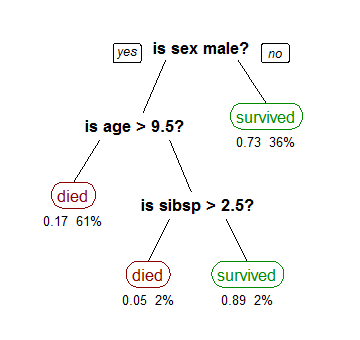

Reference: https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052


# 가지 분할 algorithms
- ID3
  - data의 target value가 같다면 leaf node
  - 분류기준이 될 feature data가 남지 않았다면 leaf node
  - 가장 확률이 높은 target value로 예측
  - **분류**: Impurity(Entropy / Gini) index가 가장 낮은 분할 조건을 탐색, 분할  
    (최적의 분할 조건을 찾을 때까지 반복)
- C4.5
- C5.0
- CART

# Entropy

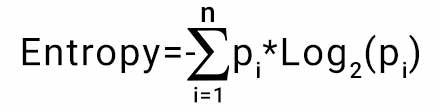

Reference: https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8

# Gini Index
- 1에 각 class의 probability의 제곱을 뺀 값으로 class가 많을수록 값이 높고 class가 작아 purity가 높을수록 gini index가 낮다.

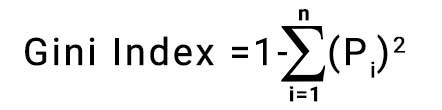

Reference: https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8

# Limitation of decision tree
- **Overfitting이 많이 발생**
  - Depth가 깊을수록 overfit 가능성이 높음

- Overfit을 방지하기 위해 **pruning, Ensemble (Random forest)**등을 이용한다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

In [ ]:
print(load_breast_cancer().DESCR)
X, y = load_breast_cancer(return_X_y = True, as_frame = True)

X = X[['mean radius', 'mean texture', 'mean area']]
print(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
def total_score(y_actual, y_predict):
  print('Accuracy: ', accuracy_score(y_actual, y_predict))
  print('Precision: ', precision_score(y_actual, y_predict, average = 'weighted'))
  print('Recall: ', recall_score(y_actual, y_predict, average = 'weighted'))
  print('F1 score: ', f1_score(y_actual, y_predict, average = 'weighted'))

def roc(y_actual, y_score, title, p_label = 1):
  fpr, tpr, threshold = roc_curve(y_actual, y_score, pos_label = p_label)
  _, axe = plt.subplots()
  axe.plot(fpr, tpr)
  axe.set_xlabel('False Positive Rate (FPR)')
  axe.set_ylabel('True Positive Rate (TPR)')
  auc_score = roc_auc_score(y_actual, y_score)
  axe.text(0.6, 0.8, 'AUC score: {:.3f}'.format(auc_score), fontsize = 15)
  axe.set_title(title, fontsize = 20)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

max_depth을 조절하여 overfitting을 방지할 수 있음


Accuracy:  0.8601398601398601
Precision:  0.8723404255319149
Recall:  0.9111111111111111
F1 score:  0.891304347826087


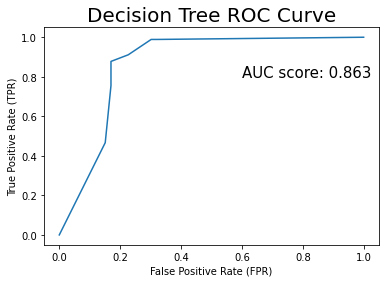

In [ ]:
dt = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)

total_score(y_test, y_pred)
roc(y_test, y_pred_proba[:,1], 'Decision Tree ROC Curve')

[Text(0.6077586206896551, 0.9166666666666666, 'X[2] <= 696.05\n0.468\n426\n[159, 267]'),
 Text(0.35344827586206895, 0.75, 'X[1] <= 19.61\n0.227\n298\n[39, 259]'),
 Text(0.13793103448275862, 0.5833333333333334, 'X[2] <= 527.7\n0.092\n207\n[10, 197]'),
 Text(0.06896551724137931, 0.4166666666666667, 'X[1] <= 16.55\n0.04\n146\n[3, 143]'),
 Text(0.034482758620689655, 0.25, '0.0\n78\n[0, 78]'),
 Text(0.10344827586206896, 0.25, 'X[1] <= 16.6\n0.084\n68\n[3, 65]'),
 Text(0.06896551724137931, 0.08333333333333333, '0.5\n2\n[1, 1]'),
 Text(0.13793103448275862, 0.08333333333333333, '0.059\n66\n[2, 64]'),
 Text(0.20689655172413793, 0.4166666666666667, 'X[2] <= 535.95\n0.203\n61\n[7, 54]'),
 Text(0.1724137931034483, 0.25, '0.0\n2\n[2, 0]'),
 Text(0.2413793103448276, 0.25, 'X[1] <= 15.74\n0.155\n59\n[5, 54]'),
 Text(0.20689655172413793, 0.08333333333333333, '0.0\n24\n[0, 24]'),
 Text(0.27586206896551724, 0.08333333333333333, '0.245\n35\n[5, 30]'),
 Text(0.5689655172413793, 0.5833333333333334, 'X[2] <

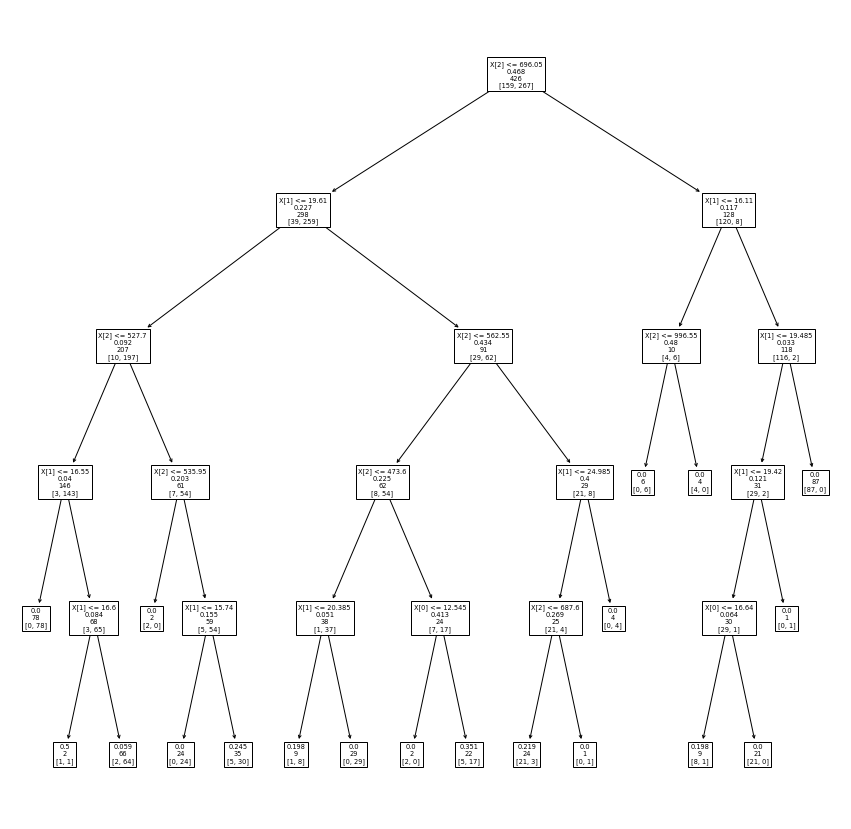

In [ ]:
_, axe = plt.subplots(figsize = (15, 15))
plot_tree(dt, label = 'none', ax = axe)

# Application
**Dry bean에서 ShapeFactor (1, 2, 3, 4)으로 Class를 분류**

Attribute Information:  
> 1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.  
2.) Perimeter (P): Bean circumference is defined as the length of its border.  
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.  
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.  
5.) Aspect ratio (K): Defines the relationship between L and l.  
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.  
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.  
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.  
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.  
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.  
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)  
12.)Compactness (CO): Measures the roundness of an object: Ed/L  
13.)ShapeFactor1 (SF1)  
14.)ShapeFactor2 (SF2)  
15.)ShapeFactor3 (SF3)  
16.)ShapeFactor4 (SF4)  
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [ ]:
dry_bean = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Data/Dry_Bean_Dataset.csv')
bean_data = dry_bean[['ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']]

# Shape Factor와 class간의 상관관계 관찰

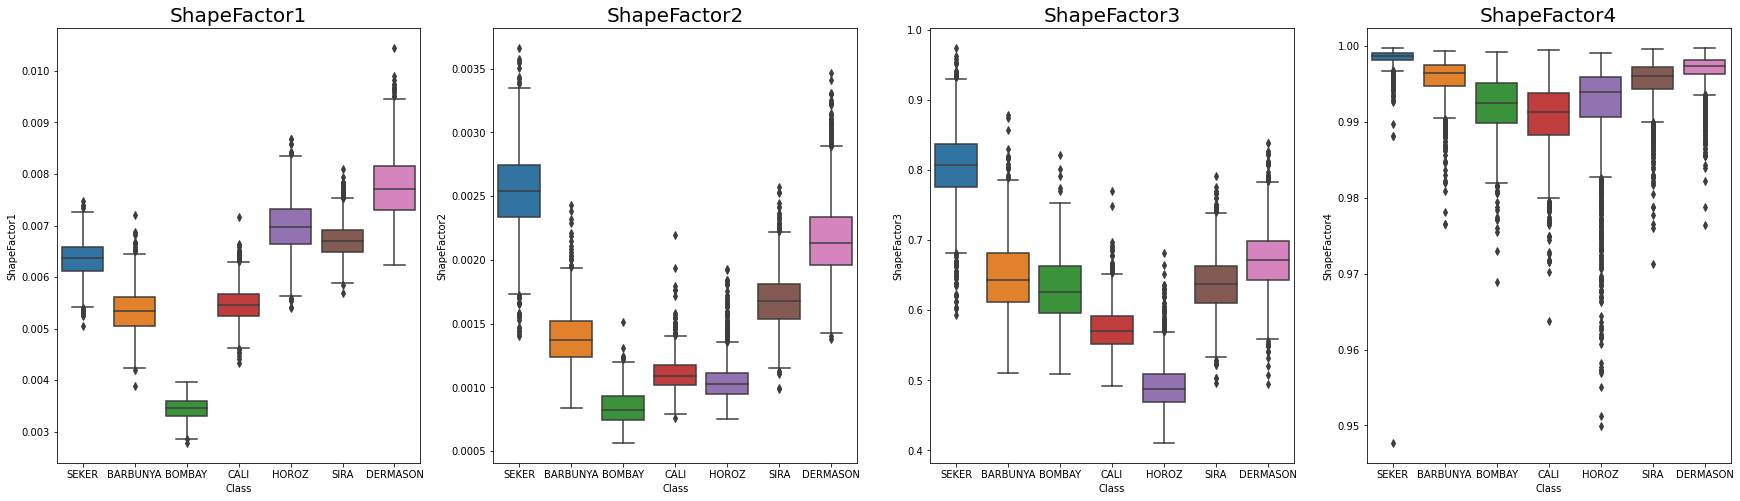

In [ ]:
fig, axes = plt.subplots(1, 4, figsize = (30, 8))

for i in range(4):
  sns.boxplot(data = bean_data, x = 'Class', y = 'ShapeFactor' + str(i+1), ax = axes[i])
  axes[i].set_title('ShapeFactor' + str(i+1), fontsize = 20)

# Outlier 제거

In [ ]:
print(bean_data.describe())

for i in range(1, 5):
  Mean = bean_data['ShapeFactor' + str(i)].mean()
  Std = bean_data['ShapeFactor' + str(i)].std()
  filter1 = bean_data['ShapeFactor' + str(i)] > (Mean - 1.96 * Std)
  filter2 = bean_data['ShapeFactor' + str(i)] < (Mean + 1.96 * Std)
  bean_data = bean_data[filter1 & filter2]

print(bean_data.describe())

       ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4
count  13611.000000  13611.000000  13611.000000  13611.000000
mean       0.006564      0.001716      0.643590      0.995063
std        0.001128      0.000596      0.098996      0.004366
min        0.002778      0.000564      0.410339      0.947687
25%        0.005900      0.001154      0.581359      0.993703
50%        0.006645      0.001694      0.642044      0.996386
75%        0.007271      0.002170      0.696006      0.997883
max        0.010451      0.003665      0.974767      0.999733
       ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4
count  11442.000000  11442.000000  11442.000000  11442.000000
mean       0.006686      0.001708      0.637613      0.995656
std        0.000934      0.000512      0.086164      0.002842
min        0.004360      0.000762      0.451381      0.986441
25%        0.006069      0.001229      0.585289      0.994180
50%        0.006723      0.001710      0.642117      0.996452
75%     

# Training, Testing data 분리

In [ ]:
X = bean_data.loc[:,'ShapeFactor1':'ShapeFactor4']
class_code = dict(zip(bean_data['Class'], bean_data['Class'].astype('category').cat.codes))
print(class_code)
y = bean_data['Class'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

{'SEKER': 4, 'BARBUNYA': 0, 'CALI': 1, 'HOROZ': 3, 'SIRA': 5, 'DERMASON': 2}


In [ ]:
print(y_test.value_counts())

2    824
5    652
3    386
1    344
4    330
0    325
dtype: int64


# Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred_proba = dt.predict_proba(X_test)

print(dt.get_depth())
print(classification_report(y_test, dt_pred))

#roc(y_test, dt_pred_proba[:,1], 'Decision Tree ROC Curve')

8
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       325
           1       0.88      0.81      0.84       344
           2       0.88      0.92      0.90       824
           3       0.96      0.91      0.93       386
           4       0.92      0.89      0.91       330
           5       0.83      0.82      0.82       652

    accuracy                           0.87      2861
   macro avg       0.87      0.86      0.87      2861
weighted avg       0.87      0.87      0.87      2861



# Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       325
           1       0.59      0.06      0.10       344
           2       0.51      0.86      0.64       824
           3       0.76      0.97      0.85       386
           4       0.89      0.80      0.84       330
           5       0.35      0.35      0.35       652

    accuracy                           0.55      2861
   macro avg       0.52      0.50      0.46      2861
weighted avg       0.50      0.55      0.49      2861



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes (Gaussian)

In [ ]:
nb = GaussianNB().fit(X_train, y_train)
nb_pred = nb.predict(X_test)

print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       325
           1       0.79      0.89      0.84       344
           2       0.91      0.90      0.90       824
           3       0.96      0.94      0.95       386
           4       0.92      0.92      0.92       330
           5       0.83      0.87      0.85       652

    accuracy                           0.88      2861
   macro avg       0.88      0.87      0.87      2861
weighted avg       0.88      0.88      0.88      2861



# 결론
- Logistic Regression보다는 Decision tree 또는 Naive Bayes의 accuracy가 높게 측정되었다.

# ROC Curve
- 각 class에 대한 true positive rate를 측정한다.
- 나머지 classes에 대해서는 모두 rest(나머지)라는 class 1개로 통일해서 본다.
- 위의 방법을 통해 binary로 roc curve를 만들 수 있다.


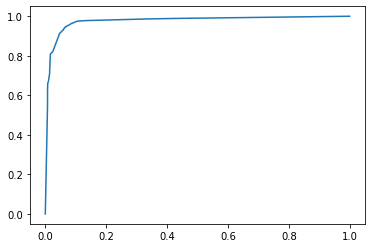

In [ ]:
fpr, tpr, th = metrics.roc_curve(y_test, dt_pred_proba[:, 2], pos_label = 2)
_, axe = plt.subplots()
axe.plot(fpr, tpr)

# 예제 2
# Abalon data에서 Sex를 제외한 나머지 data 중에서 3가지를 선정하여 sex를 결정할 수 있는 decision tree model을 만든다.
- **Target**: Sex [M, F, and I (infant)]

- Attribute Informations
  - Length (mm): Longest shell measurement  
  - Diameter (mm): Perpendicular to length  
  - Height (mm): With meat in shell  
  - Whole weight (g): Whole abalone  
  - Shucked weight (g): Weight of meat  
  - Viscera weight (g): Gut weight (after bleeding)  
  - Shell weight (g): After being dried  
  - Rings: +1.5 gives the age in years

In [ ]:
abalon_data = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Data/abalone.csv', header = None)
abalon_data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


print(abalon_data)
print(abalon_data.dtypes)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

# Abalon features 살펴보기
- 각 features간의 상관 관계 파악
- 성별과의 상관 관계 파악

In [ ]:
pip install statannot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

F v.s. I: t-test independent samples with Bonferroni correction, P_val=2.127e-269 stat=3.961e+01
I v.s. M: t-test independent samples with Bonferroni correction, P_val=7.725e-211 stat=-3.382e+01
F v.s. M: t-test independent samples with Bonferroni correction, P_val=2.696e-06 stat=4.924e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

F v.s. I: t-test independent samples with Bonferroni correction, P_val=1.420e-286 stat=4.119e+01
I v.s. M: t-test independent samples with Bonferroni correction, P_val=2.917e-223 stat=-3.500e+01
F v.s. M: t-test independent samples with Bonferroni correction, P_val=5.661e-07 stat=5.223e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.

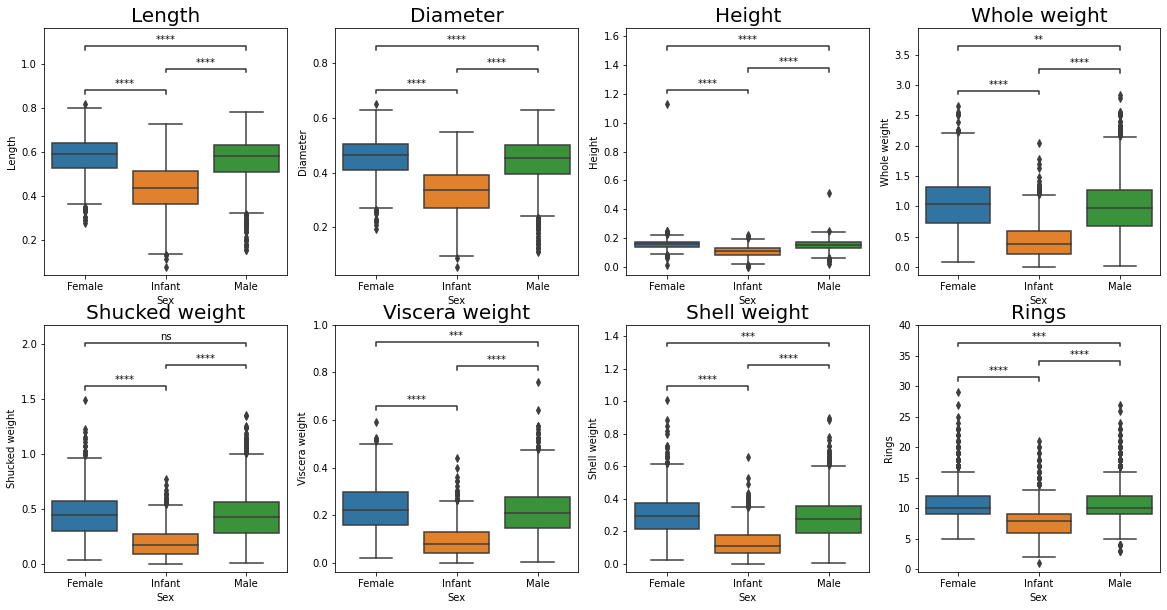

In [ ]:
from statannot import add_stat_annotation

fig, axes = plt.subplots(2, 4, figsize = (20, 10))
order = ['F', 'I', 'M']

for i in range(2):
  for j in range(4):
    sns.boxplot(data = abalon_data, x = 'Sex', y = abalon_data.columns[4*i + j +1], ax = axes[i][j], order = order)
    axes[i][j].set_title(abalon_data.columns[4*i + j +1], fontsize = 20)
    add_stat_annotation(axes[i][j], data = abalon_data, x = 'Sex', y = abalon_data.columns[4*i + j + 1], order = order, box_pairs = [('F', 'I'), ('F', 'M'), ('I', 'M')], test = 't-test_ind', text_format = 'star', loc = 'inside')
    axes[i][j].set_xticklabels(['Female', 'Infant', 'Male'])

# Height Outlier 제거
- 95% confidence

In [ ]:
h_mean = np.mean(abalon_data['Height'])
h_std = np.std(abalon_data['Height'])
filter1 = abalon_data['Height'] > h_mean - 1.96*h_std
filter2 = abalon_data['Height'] < h_mean + 1.96*h_std
abalon_data = abalon_data[filter1 & filter2]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

F v.s. I: t-test independent samples with Bonferroni correction, P_val=7.039e-249 stat=3.787e+01
I v.s. M: t-test independent samples with Bonferroni correction, P_val=1.459e-198 stat=-3.275e+01
F v.s. M: t-test independent samples with Bonferroni correction, P_val=3.991e-05 stat=4.363e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

F v.s. I: t-test independent samples with Bonferroni correction, P_val=2.102e-265 stat=3.943e+01
I v.s. M: t-test independent samples with Bonferroni correction, P_val=1.174e-210 stat=-3.392e+01
F v.s. M: t-test independent samples with Bonferroni correction, P_val=7.268e-06 stat=4.724e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.

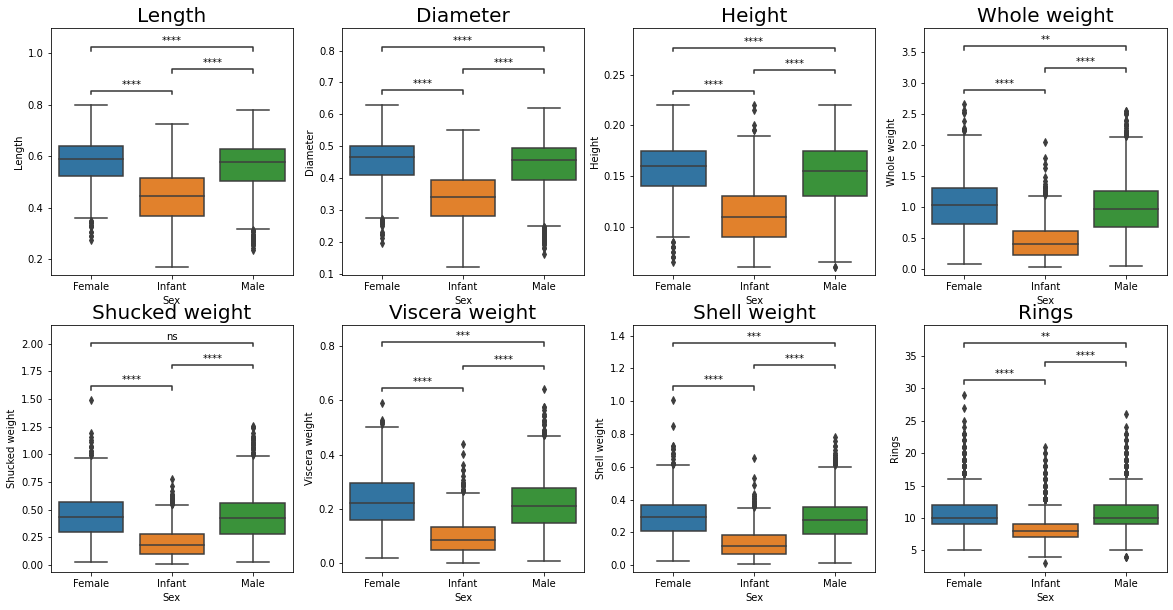

In [ ]:
fig, axes = plt.subplots(2, 4, figsize = (20, 10))
order = ['F', 'I', 'M']

for i in range(2):
  for j in range(4):
    sns.boxplot(data = abalon_data, x = 'Sex', y = abalon_data.columns[4*i + j +1], ax = axes[i][j], order = order)
    axes[i][j].set_title(abalon_data.columns[4*i + j +1], fontsize = 20)
    add_stat_annotation(axes[i][j], data = abalon_data, x = 'Sex', y = abalon_data.columns[4*i + j + 1], order = order, box_pairs = [('F', 'I'), ('F', 'M'), ('I', 'M')], test = 't-test_ind', text_format = 'star', loc = 'inside')
    axes[i][j].set_xticklabels(['Female', 'Infant', 'Male'])

# 성별 category로 변경, Heatmap을 통한 상관관계 확인

{'M': 2, 'F': 0, 'I': 1}


[Text(0.5, 0, 'Sex'),
 Text(1.5, 0, 'Length'),
 Text(2.5, 0, 'Diameter'),
 Text(3.5, 0, 'Height'),
 Text(4.5, 0, 'Whole weight'),
 Text(5.5, 0, 'Shucked weight'),
 Text(6.5, 0, 'Viscera weight'),
 Text(7.5, 0, 'Shell weight'),
 Text(8.5, 0, 'Rings')]

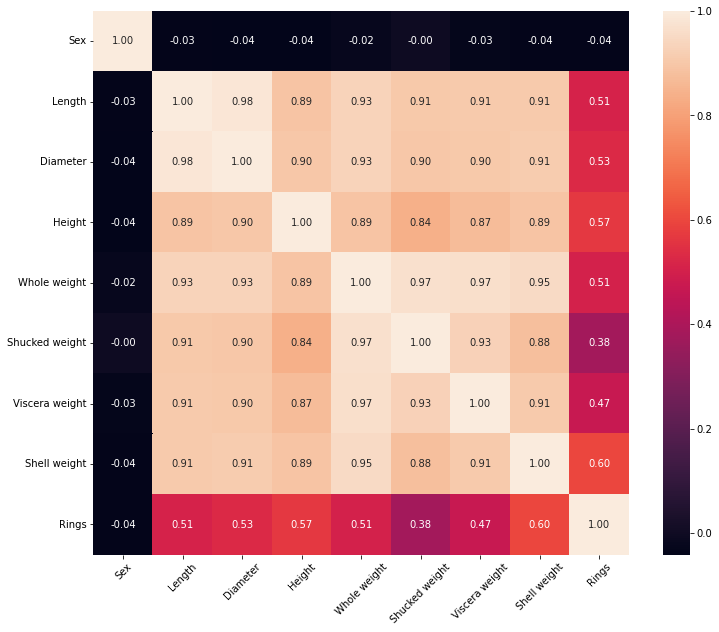

In [ ]:
sex_code = dict(zip(abalon_data['Sex'], abalon_data['Sex'].astype('category').cat.codes))
abalon_data['Sex'] = abalon_data['Sex'].astype('category').cat.codes
print(sex_code)

plt.figure(figsize = (12, 10))
heat_map = sns.heatmap(abalon_data.corr(method = 'pearson'), annot = True, fmt = '.2f')
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation = 45)

# 중간 결과
- 모든 features에서 male과 female은 비슷한 평균을 가지는 반면 Infant만 낮은 값으로 측정되었다.
- 따라서, Infant와 Female or Male에 대한 분류는 가능할 것으로 예상되나 Female과 Male은 특정 features으로 분류가 불가능할 것으로 예측된다.

# Training, testing data 분리
- Independent variables으로 Height, Viscera weight, Rings사용


In [ ]:
X = abalon_data[['Height', 'Viscera weight', 'Rings']]
y = abalon_data['Sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

# Decision Tree를 이용한 학습

In [ ]:
dt = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 10, criterion = 'entropy').fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred_proba = dt.predict_proba(X_test)

print(sex_code)
print(classification_report(y_test, dt_pred))

{'M': 2, 'F': 0, 'I': 1}
              precision    recall  f1-score   support

           0       0.46      0.38      0.42       322
           1       0.72      0.78      0.75       316
           2       0.50      0.54      0.52       374

    accuracy                           0.56      1012
   macro avg       0.56      0.57      0.56      1012
weighted avg       0.56      0.56      0.56      1012



# Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred_proba = lr.predict_proba(X_test)

print(sex_code)
print(classification_report(y_test, lr_pred))

{'M': 2, 'F': 0, 'I': 1}
              precision    recall  f1-score   support

           0       0.44      0.20      0.28       322
           1       0.68      0.79      0.73       316
           2       0.45      0.60      0.51       374

    accuracy                           0.53      1012
   macro avg       0.52      0.53      0.51      1012
weighted avg       0.52      0.53      0.51      1012



# Naive Bayes

In [ ]:
nb = GaussianNB().fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_pred_proba = nb.predict_proba(X_test)

print(sex_code)
print(classification_report(y_test, nb_pred))

{'M': 2, 'F': 0, 'I': 1}
              precision    recall  f1-score   support

           0       0.46      0.51      0.48       322
           1       0.64      0.83      0.72       316
           2       0.44      0.29      0.35       374

    accuracy                           0.53      1012
   macro avg       0.51      0.54      0.52      1012
weighted avg       0.51      0.53      0.51      1012



# K-Fold cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

accuracy_history = []
f1_score_history = []
dt = DecisionTreeClassifier()

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 50)
for train_index, test_index in kf.split(X, y):
  X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
  y_train, y_test = y[train_index], y[test_index]
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  accuracy_history.append(accuracy_score(y_test, y_pred))
  f1_score_history.append(f1_score(y_test, y_pred, average = None))

print(accuracy_history)
print(np.mean(accuracy_history))
print(f1_score_history)
print('Female: ', np.mean(pd.DataFrame(f1_score_history)[0]))
print('Infant: ', np.mean(pd.DataFrame(f1_score_history)[1]))
print('Male: ', np.mean(pd.DataFrame(f1_score_history)[2]))

KeyError: ignored

# ROC Curve

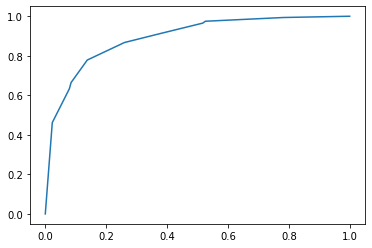

In [ ]:
fpr, tpr, th = metrics.roc_curve(y_test, dt_pred_proba[:, 1], pos_label = 1)
_, axe = plt.subplots()
axe.plot(fpr, tpr)

# Log scale Linear Regression
- Graph의 분포가 exponential 형태일 경우 log scale으로 linear regression을 만든다.

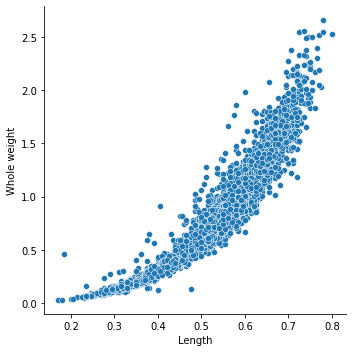

In [ ]:
sns.relplot(data = abalon_data, x = 'Length', y = 'Whole weight')

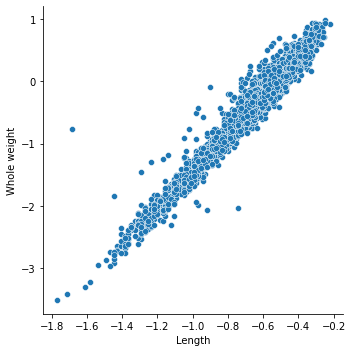

In [ ]:
log_x = np.log(abalon_data['Length'])
log_y = np.log(abalon_data['Whole weight'])

sns.relplot(x = log_x, y = log_y)